# Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
data = pd.read_excel('data.xlsx')

In [3]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


# 1. Check for missing values

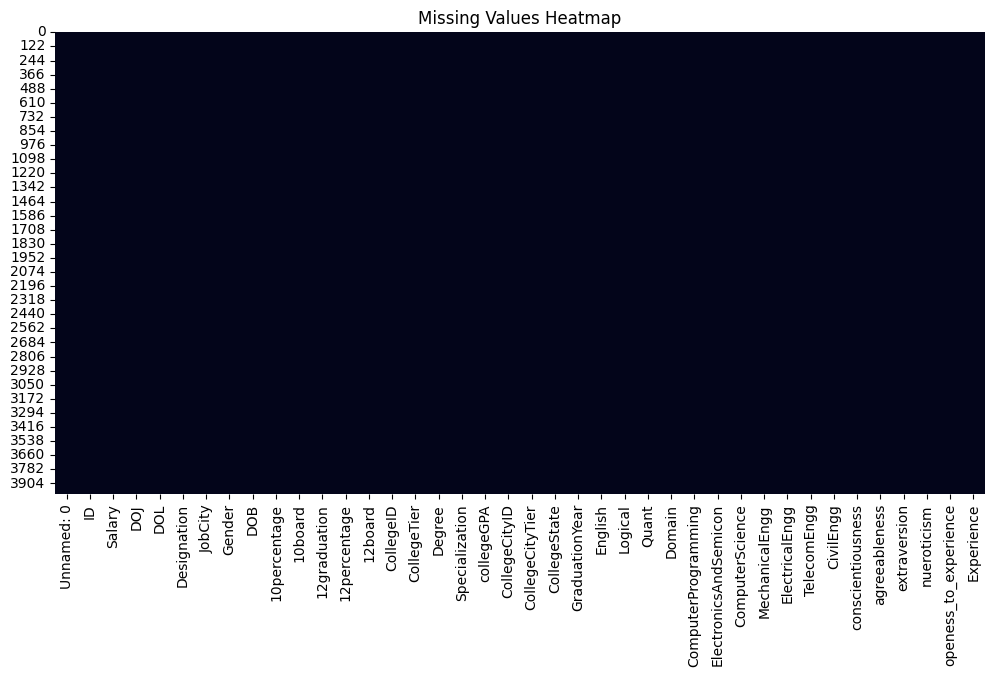

In [19]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False)  # Visualize missing data
plt.title('Missing Values Heatmap')
plt.show()

# 2. Correlation Matrix Heatmap

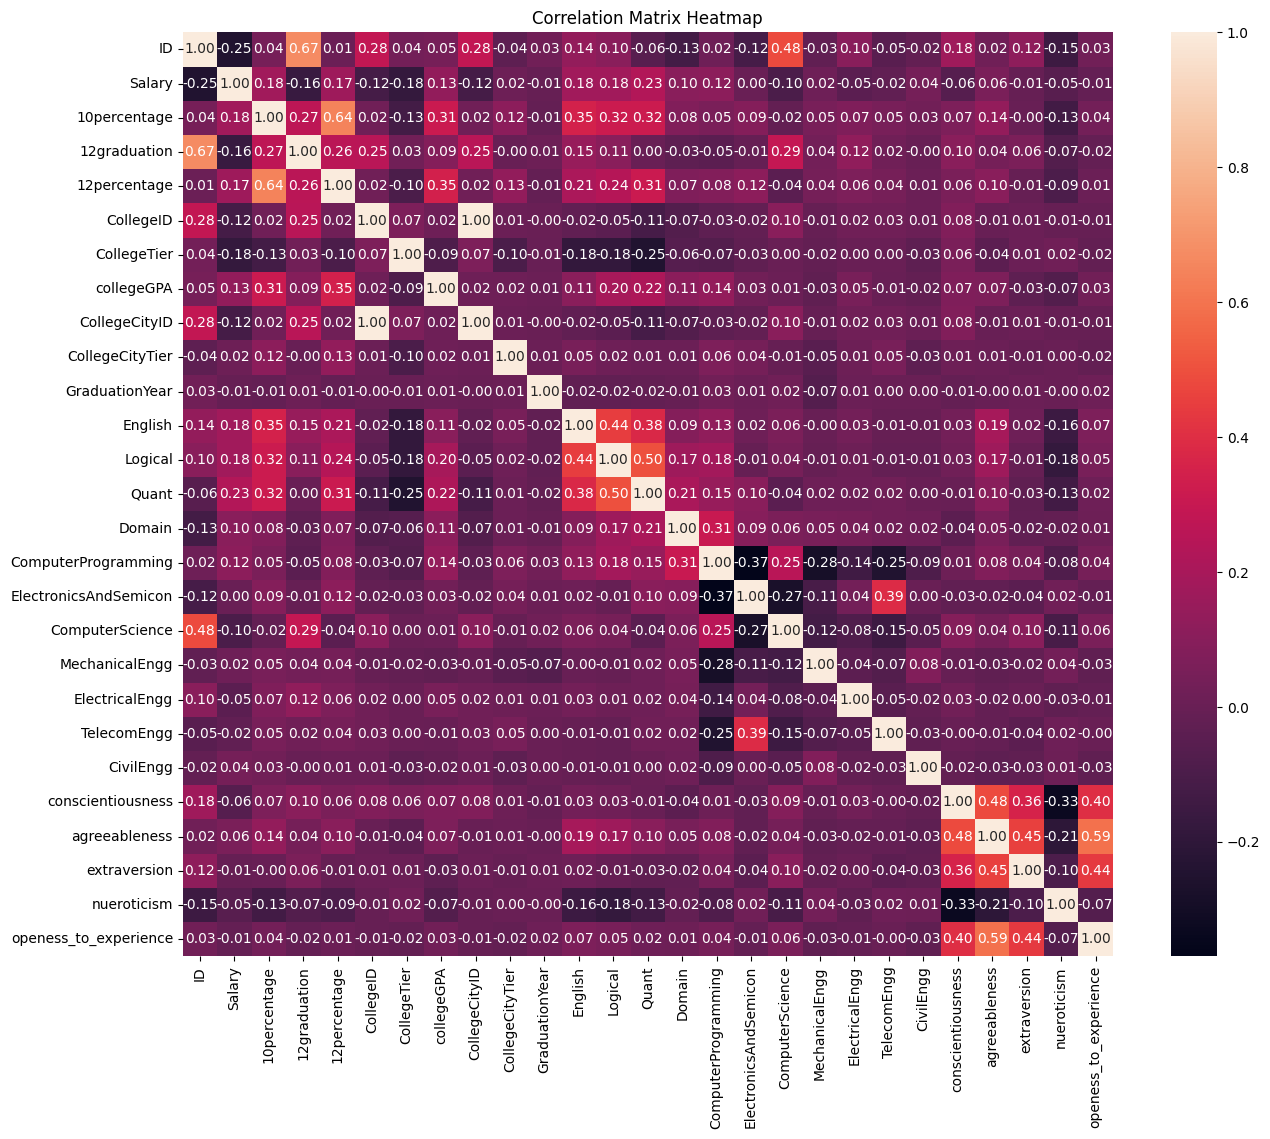

In [21]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numeric data only
corr = numeric_data.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# 3. Salary vs. Designation

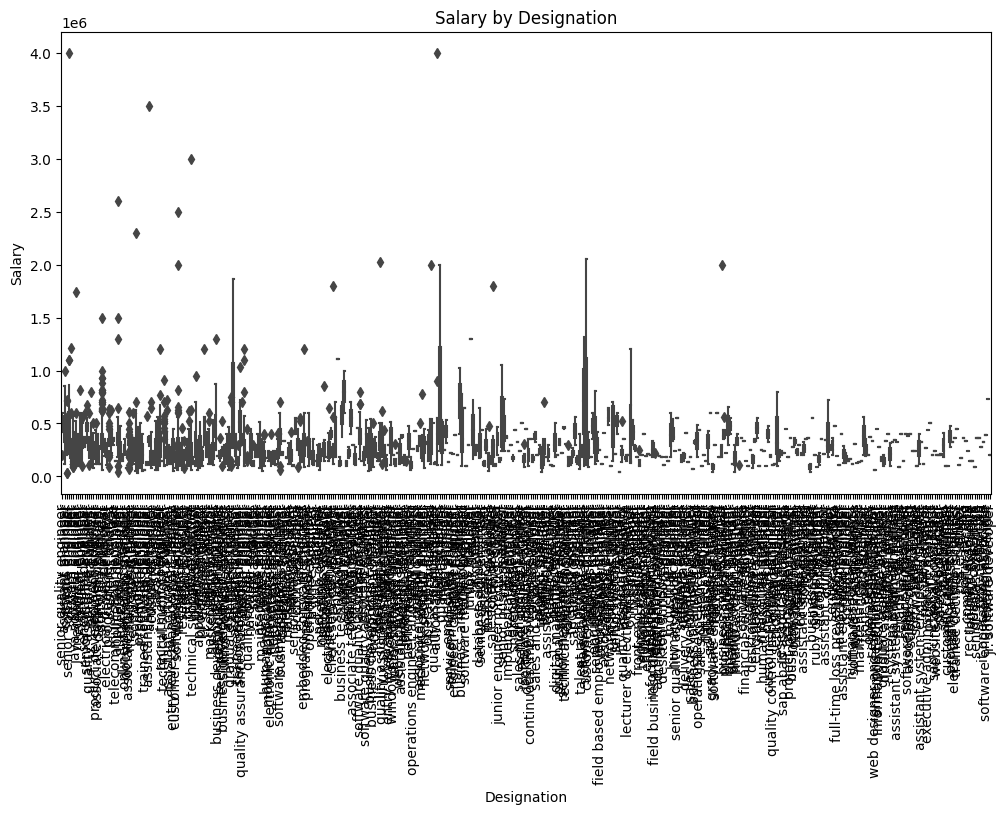

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Designation', y='Salary', data=data)  # Boxplot of Salary by Designation
plt.xticks(rotation=90)
plt.title('Salary by Designation')
plt.show()

# 4. Salary vs. Work Experience

In [23]:
data['DOJ'] = pd.to_datetime(data['DOJ'])
data['DOL'] = data['DOL'].replace('present', pd.to_datetime('today'))
data['DOL'] = pd.to_datetime(data['DOL'])
data['Experience'] = (data['DOL'] - data['DOJ']).dt.days / 365  # Experience in years

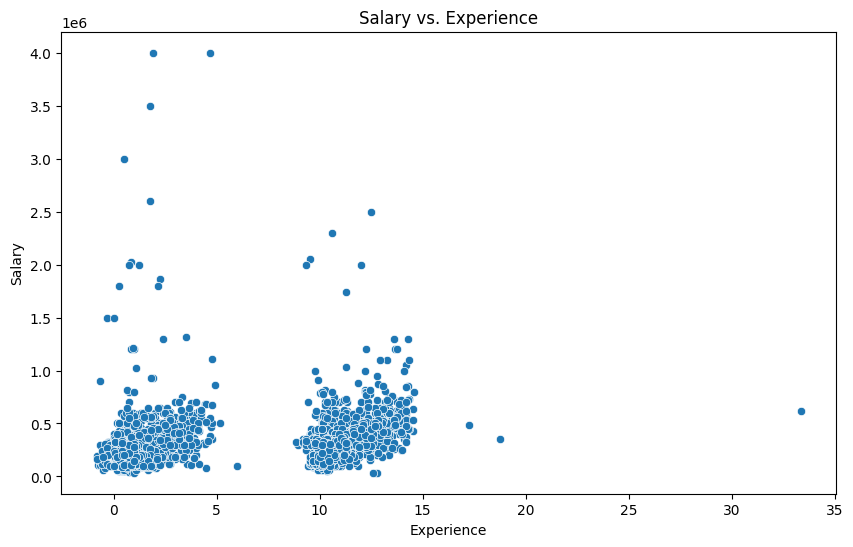

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Experience', y='Salary', data=data)  # Scatter plot of Salary vs. Experience
plt.title('Salary vs. Experience')
plt.show()

# 5. Distribution of Academic Scores

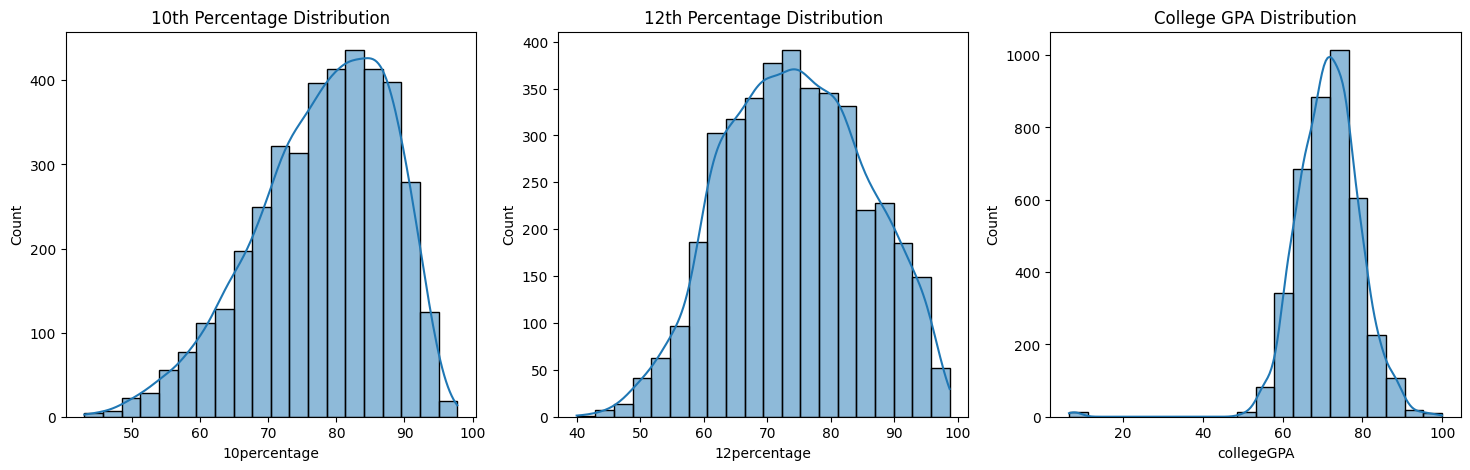

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['10percentage'], bins=20, kde=True, ax=axes[0])  # 10th percentage
axes[0].set_title('10th Percentage Distribution')
sns.histplot(data['12percentage'], bins=20, kde=True, ax=axes[1])  # 12th percentage
axes[1].set_title('12th Percentage Distribution')
sns.histplot(data['collegeGPA'], bins=20, kde=True, ax=axes[2])  # College GPA
axes[2].set_title('College GPA Distribution')
plt.show()

# 6. Specialization Counts

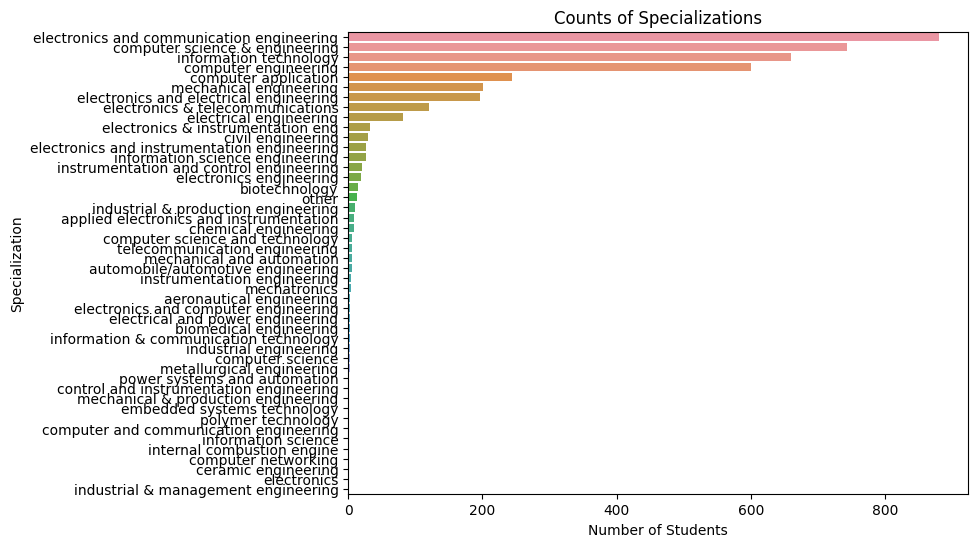

In [26]:
plt.figure(figsize=(8, 6))
spec_counts = data['Specialization'].value_counts()
sns.barplot(y=spec_counts.index, x=spec_counts.values)  # Counts of each specialization
plt.title('Counts of Specializations')
plt.xlabel('Number of Students')
plt.ylabel('Specialization')
plt.show()

# 7. Gender vs. Salary

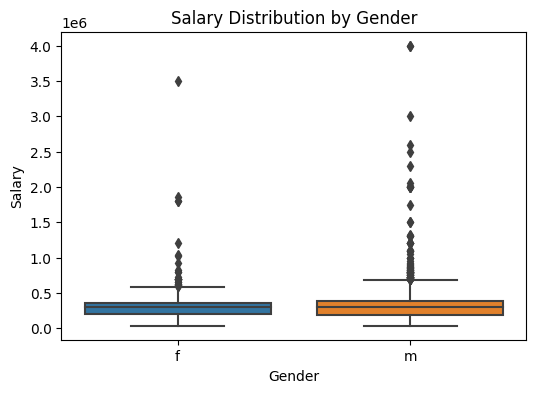

In [27]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Salary', data=data)  # Salary distribution by Gender
plt.title('Salary Distribution by Gender')
plt.show()

# 8. Distribution of Psychological Traits

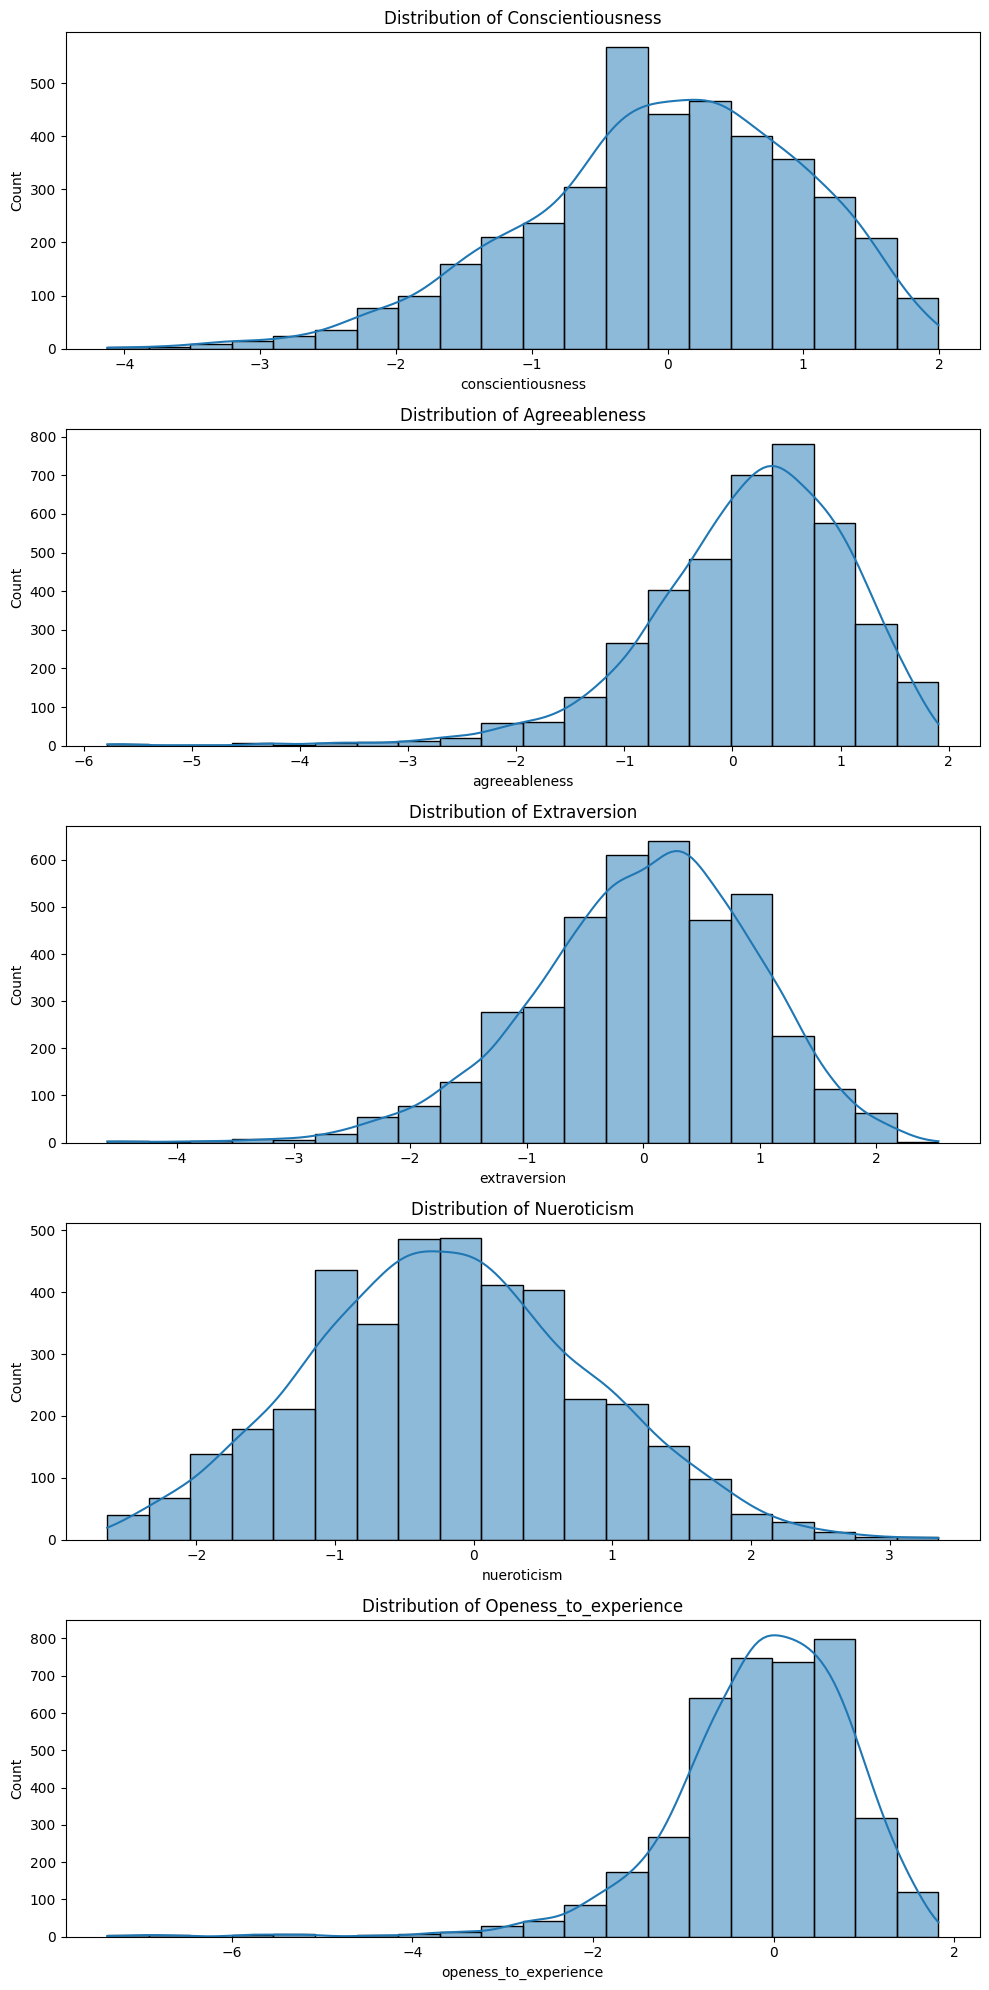

In [29]:
traits = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
fig, axes = plt.subplots(len(traits), 1, figsize=(10, 20))
for i, trait in enumerate(traits):
    sns.histplot(data[trait], bins=20, kde=True, ax=axes[i])  # Each trait distribution
    axes[i].set_title(f'Distribution of {trait.capitalize()}')
plt.tight_layout()
plt.show()

# 9. Salary vs. College GPA

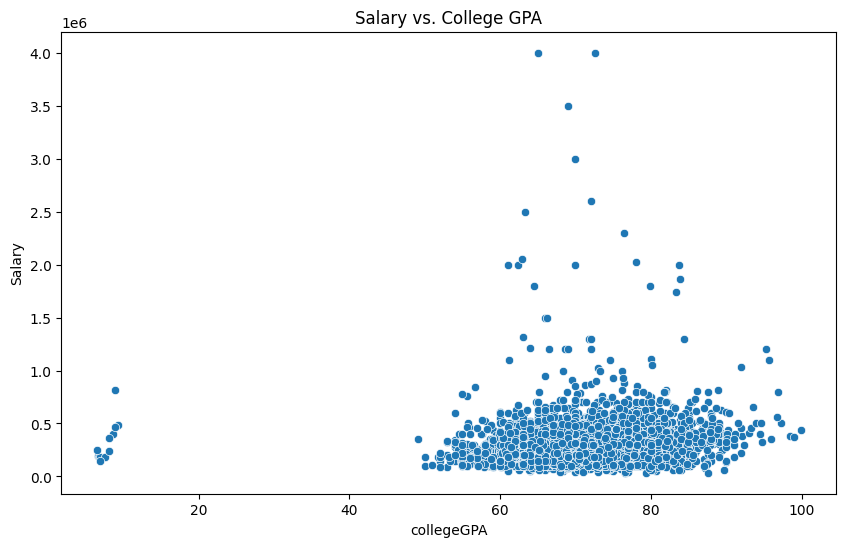

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='collegeGPA', y='Salary', data=data)  # Salary vs. College GPA
plt.title('Salary vs. College GPA')
plt.show()

# 10. Pairplot of Numerical Features

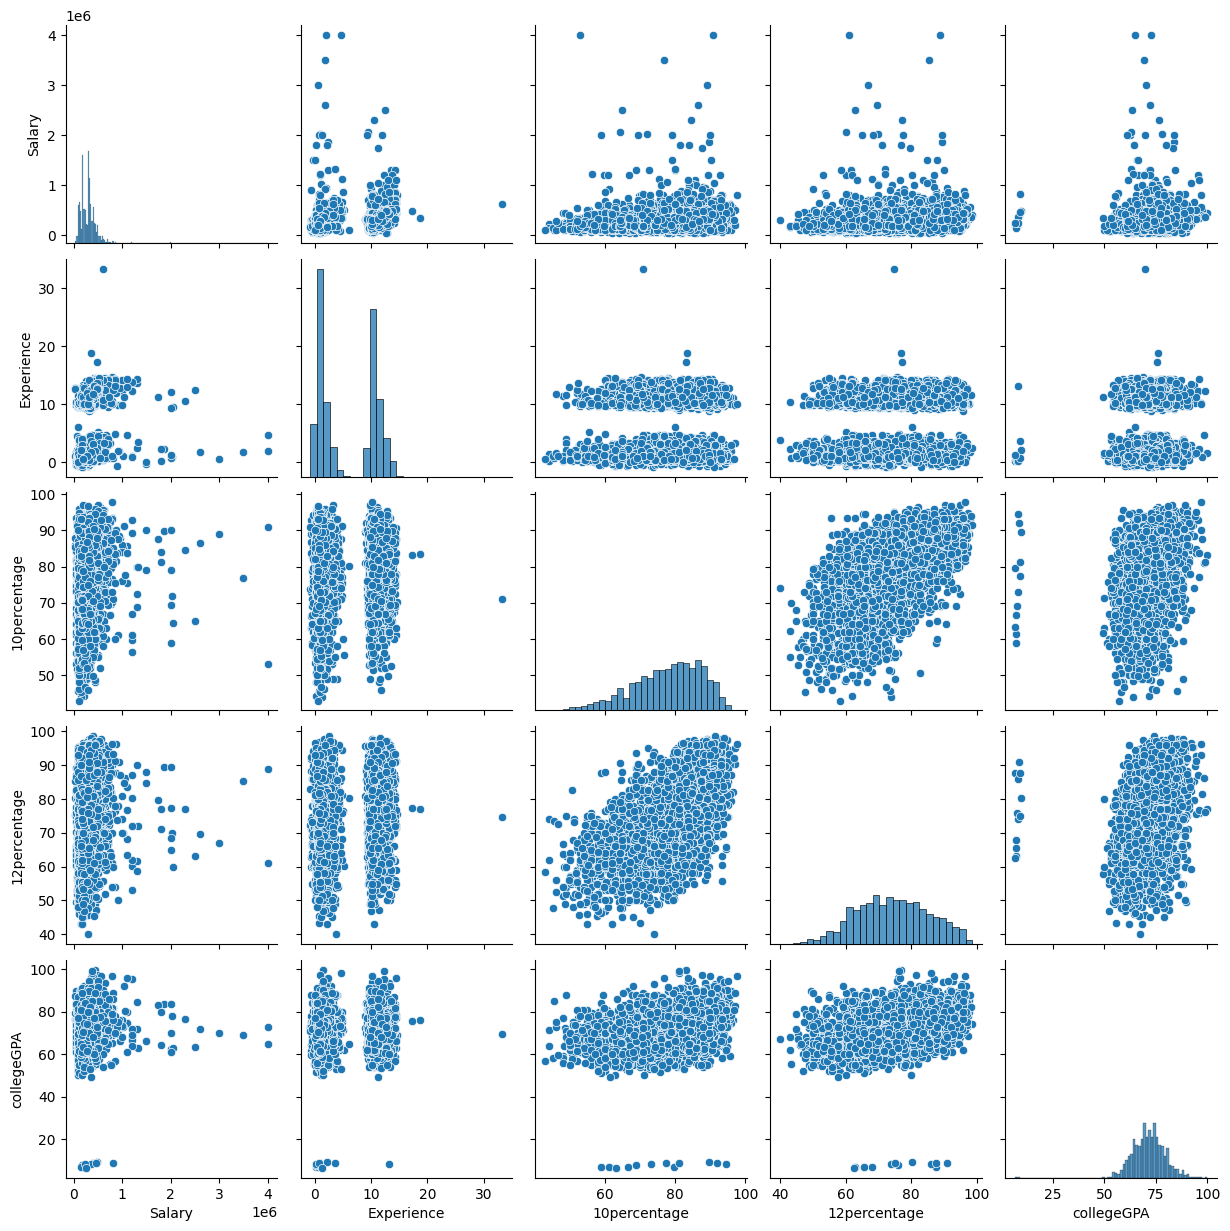

In [31]:
numerical_features = ['Salary', 'Experience', '10percentage', '12percentage', 'collegeGPA']
sns.pairplot(data[numerical_features])  # Pairwise relationships
plt.show()

# 11. Salary Distribution by Job City (Top 10)

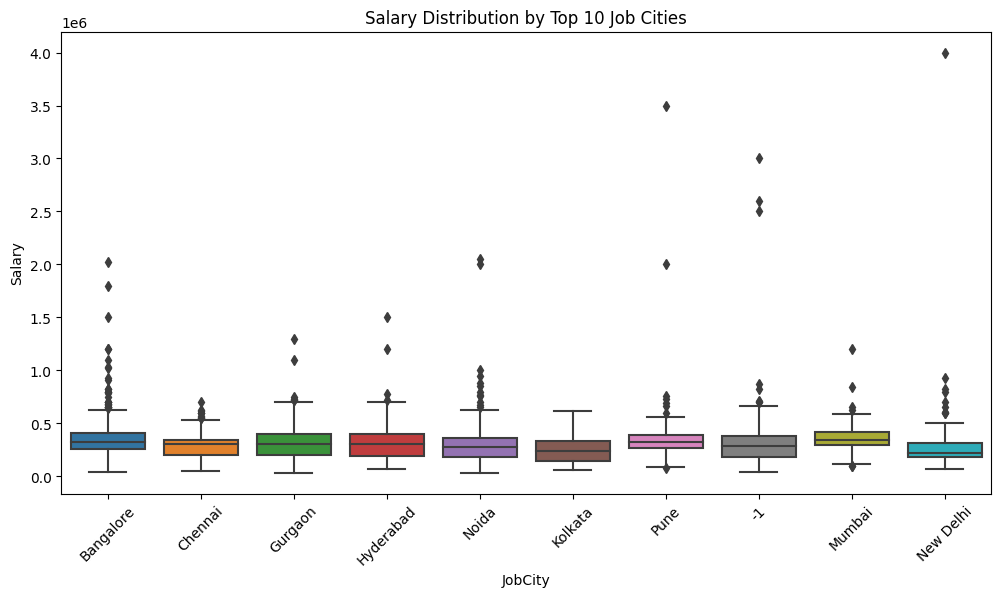

In [32]:
top_cities = data['JobCity'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobCity', y='Salary', data=data[data['JobCity'].isin(top_cities)])  # Salary by Top Cities
plt.xticks(rotation=45)
plt.title('Salary Distribution by Top 10 Job Cities')
plt.show()


# 12. Age Distribution of Employees

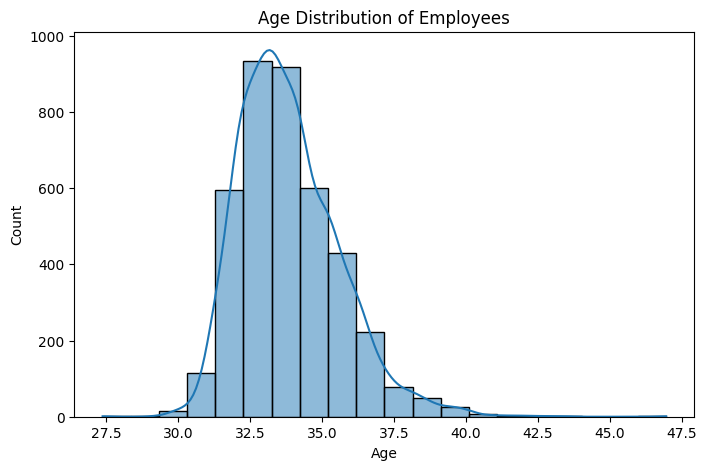

In [33]:
data['DOB'] = pd.to_datetime(data['DOB'])
data['Age'] = (pd.to_datetime('today') - data['DOB']).dt.days / 365  # Calculate Age
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=20, kde=True)  # Age distribution
plt.title('Age Distribution of Employees')
plt.show()

1. Missing Values Heatmap: Shows where data is missing in the dataset.
2. Correlation Matrix Heatmap: Displays correlation coefficients between numerical variables.
3. Salary by Designation: Visualizes salary ranges for different job titles.
4. Salary vs. Experience: Plots salary against years of work experience.
5. Academic Scores Distribution: Shows distributions of 10th, 12th percentages, and college GPA.
6. Counts of Specializations: Bar chart of the number of students in each specialization.
7. Salary Distribution by Gender: Compares salary distributions between genders.
8. Distribution of Psychological Traits: Histograms for each personality trait.
9. Salary vs. College GPA: Examines relationship between college GPA and salary.
10. Pairplot of Numerical Features: Visualizes pairwise relationships among numerical variables.
11. Salary Distribution by Top 10 Job Cities: Salary ranges in the most common job cities.
12. Age Distribution of Employees: Shows how employee ages are distributed.